In [34]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [35]:
# reshape
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [36]:
# convert class vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
# build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=["accuracy"])


In [46]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.3785 - acc: 0.8897 - val_loss: 0.1463 - val_acc: 0.9563
Epoch 2/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.1573 - acc: 0.9542 - val_loss: 0.0977 - val_acc: 0.9714
Epoch 3/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.1164 - acc: 0.9653 - val_loss: 0.0809 - val_acc: 0.9749
Epoch 4/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0958 - acc: 0.9713 - val_loss: 0.0662 - val_acc: 0.9788
Epoch 5/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0845 - acc: 0.9747 - val_loss: 0.0579 - val_acc: 0.9813
Epoch 6/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0746 - acc: 0.9774 - val_loss: 0.0511 - val_acc: 0.9824
Epoch 7/12
60000/60000 [==============================] - 4s 58us/step - loss: 0.0665 - acc: 0.9798 - val_loss: 0.0476 - val_acc

In [47]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("test accuracy: ", score[1])

test loss:  0.03886586471456103
test accuracy:  0.9856


In [48]:
# load my own image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = image.load_img("three.jpg")
x_sample = image.img_to_array(img)
print(x_sample.shape)

(28, 28, 3)


In [70]:
x_reshaped = (x_sample[:,:,0].astype('float32')/255).reshape(1, img_rows, img_cols, 1)
x_reshaped.shape

(1, 28, 28, 1)

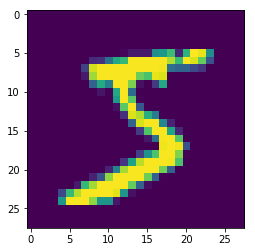

In [75]:
plt.imshow(x_train[0,:,:,0])

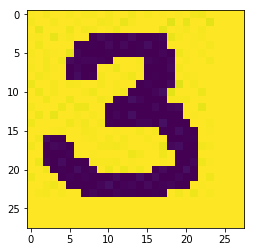

In [76]:
plt.imshow(x_reshaped[0,:,:,0])

In [71]:
pred = model.predict(x_reshaped)

In [72]:
print(pred)
np.argmax(pred)

[[1.9719260e-04 3.0870855e-05 8.6809404e-02 7.9268448e-02 6.7044934e-04
  2.2123128e-03 8.1056136e-01 2.1740276e-05 2.0226533e-02 1.6855244e-06]]


6